In [292]:
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
import random
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer

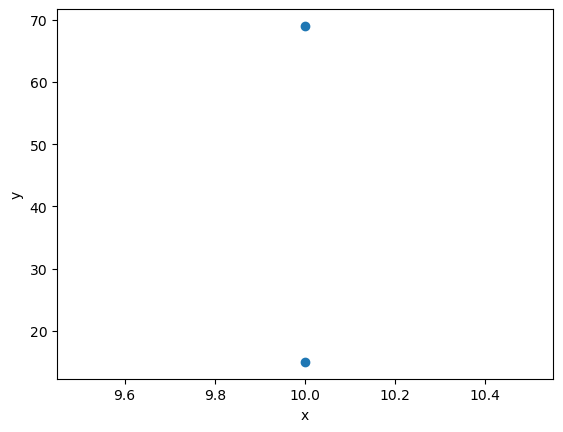

In [293]:
vis1 = Visualizer()
vis1.add_point([(10, 15), (10, 69)])
vis1.show()

In [294]:
def generate_uniform_points(left, right, n = 10 ** 5, prec = 5):
    random.seed()
    points=[]
    delta = right - left
    for i in range(n):
        x1 = random.random() * delta + left
        y1 = random.random() * delta + left
        x1, y1 = round(x1, prec), round(y1, prec)
        points.append((x1, y1))
    return points


In [295]:
def orient(A, B, C, eps):
        det = (C[1]-B[1])*(B[0]-A[0])-(C[0]-B[0])*(B[1]-A[1])
        if(abs(det) <= eps):
            return 0
        if(det < 0.0):
            return -1
        return 1
temp = []

def norm(A):
        return A[0] * A[0] + A[1] * A[1]

In [296]:
def Mergesort(l, r, points, eps):
    if(l >= r):
        return
    mid = (l+r)//2
    Mergesort(l, mid, points, eps)
    Mergesort(mid+1, r, points, eps)
    i, j, k = l, mid+1, 0

    while(i <= mid and j <= r):
        o = orient((0, 0), points[i], points[j], eps)
        if(o == 1.0):
            temp[k] = points[i]
            i += 1
        elif(o == -1.0):
            temp[k] = points[j]
            j += 1
        else:
            if(norm(points[i]) > norm(points[j])):
                temp[k] = points[j]
                j += 1
            else:
                temp[k] = points[i]
                i += 1
        k += 1

    while(i <= mid):
        temp[k] = points[i]
        i, k = i+1, k+1

    while(j <= r):
        temp[k] = points[j]
        j, k = j+1, k+1

    for x in range(k):
        points[l+x] = temp[x]
    return

In [297]:
def generate_circle_points(O, R, n = 1009):
    points=[]
    step = 0.004
    for i in range (n):
        t = step * i
        x1 = R*np.cos(t*np.pi/2)
        y1 = R*np.sin(t*np.pi/2)
        points.append((x1,y1))
    return points

In [298]:
def generate_collinear_points(a, b, n=1000):
    random.seed()
    points=[]
    A =(b[1]-a[1])/(b[0]-a[0])
    delta = 2000
    for i in range(n):
        x = random.random()*2000.0 - 1000.0
        y = A*(x-a[0])+a[1]
        points.append((x, y))
    return points

In [299]:
def det_3x3(a, b, c):
    return (c[1]-b[1])*(b[0]-a[0])-(c[0]-b[0])*(b[1]-a[1])

In [337]:
def generate_rectangle_points(a=(-10, -10), b=(10, -10), c=(10, 10), d=(-10, 10), n=5*10**5):
   # random.seed(0)
    height = c[1] - a[1]
    width = c[0] - a[0]
    area = 2*height + 2 * width
    pkt1 = random.random()*area
    x, y = 0, 0
    points = []
    for i in range(n):
        pkt1 = random.random()*area
        if(pkt1 <= width):
            x, y = a[0] + pkt1, a[1]
        elif(pkt1 <= width+height):
            pkt1 -= width
            x, y = b[0], pkt1+b[1]
        elif(pkt1 <= 2*width+height):
            pkt1 -= width+height
            x, y = c[0] - pkt1, c[1]
        else:
            pkt1 -= 2*width+height
            x, y = d[0], d[1] - pkt1
        points.append((x, y))
    return points

In [359]:
def generate_square_points(a=(0, 0), b=(10, 0), c=(10, 10), d=(0, 10),
                           axis_n=5*10**4, diag_n=5*10**4):
    #random.seed(0)
    points = []
    l = b[0] - a[0]
    x, y = 0, 0
    #diag = math.sqrt(2) * l
    n1, n2 = axis_n, diag_n
    for i in range(n1):
        p = random.random() * 2*l
        if(p <= l):
            x, y = a[0] + p, a[1]
        else:
            p -= l
            x, y = b[0], b[1] + p
        points.append((x, y))
    for j in range(n2):
        p = random.random()*l
        x, y = a[0] + p, a[1] + p
        points.append((x, y))
    return points

In [360]:
def get_color(x):
    colors = ["blue", "red", "green", "brown", "black", "cyan", "purple"]
    x = x % 7
    return colors[x]

def divide(points, L, R):
    n = len(points)
    top, bottom = [], []
    vec = (R[0] - L[0], R[1] - L[1])
    for i in range(n):
        act = points[i]
        det = det_3x3(L, R, act)
        if(det < 0):
            bottom.append(act)
        elif(det > 0):
            top.append(act)
    return bottom, top

In [361]:
def find_high(points, L, R):
    n = len(points)
    max_point, max_pole , ind = (-1 , -1), -float('inf'), -1
    for i in range(n):
        pole = det_3x3(L, R, (points[i][0], points[i][1]))
        if(pole > max_pole):
            max_pole = pole
            max_point, ind = (points[i][0], points[i][1]), points[i][2]
    return max_point, ind

In [362]:
def scal(tab1, tab2):
    for i in range(len(tab2)):
        tab1.append(tab2[i])
    return tab1

In [363]:
def find_corners(points):
    mini_point, mini, ind_mini, maxi_point, maxi, ind_maxi = (-1, -1), float('inf'), -1, (-1, -1), -float('inf'), -1
    n = len(points)
    for i in range(n):
        x, y, jd = points[i]
        if(x > maxi):
            maxi_point = (x, y)
            maxi, ind_maxi = x, points[i][2]
        if(x < mini):
            mini_point = (x, y)
            mini, ind_mini = x, points[i][2]
    return mini_point, ind_mini, maxi_point, ind_maxi

In [364]:

def QuickHull_rek(points, L, R, vis, Visual):
    global col
    n = len(points)
    #print(L, R)
    if(n == 0):
        return
    bottom, top = divide(points, L, R) #bottom odrzucamy
    if(len(top) == 0):
        return
    H, ind = find_high(top, L, R)
    #Visual.add_point([H], color = "red")
    #Visual.add_line_segment([(L, H)], color = "blue")
    #Visual.show()
    vis[ind] = 1
    QuickHull_rek(top, L, H, vis, Visual)
    #Visual.add_line_segment([(H, R)], color = "blue")
    #Visual.show()
    QuickHull_rek(top, H, R, vis, Visual)
    

In [365]:
def solve(points_test, Visual):
    global col
    n, points = len(points_test), []
    for i in range(n):
        points.append((pkt[i][0], pkt[i][1], i))
    Visual.add_point(pkt, color = "green")
    vis, res, res_points = [0] * n, [], []
    L, ind1, R, ind2 = find_corners(points)
    #Visual.add_line_segment([(L, R)], color = "blue")
    #Visual.add_point([L, R], color = "red")
    #Visual.show()
    vis[ind1], vis[ind2] = 1, 1
    QuickHull_rek(points, L, R, vis, Visual)
    QuickHull_rek(points, R, L, vis, Visual)
    for i in range(n):
        if(vis[i]):
            res.append(i)
            res_points.append((points[i][0], points[i][1]))
    return res, res_points

1000


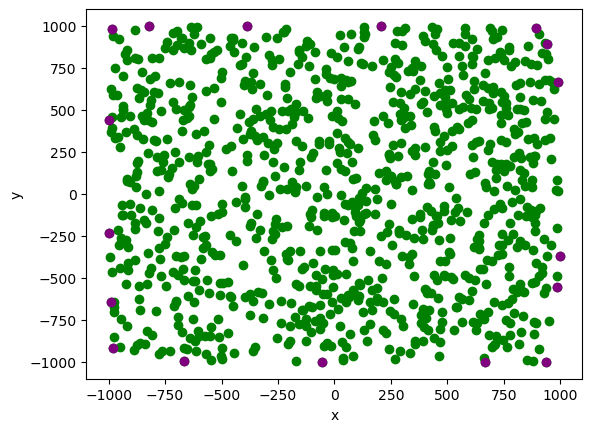

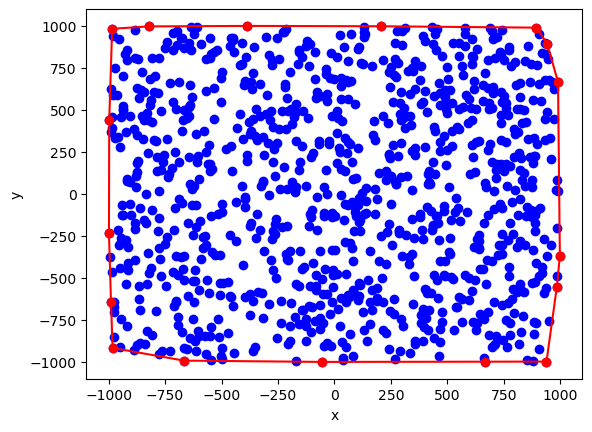

In [370]:
pkt = generate_uniform_points(-1000, 1000, 10**3, 2)
print(len(pkt))
vis2 = Visualizer()
col = 0
indexes, hull = solve(pkt, vis2)
edges = []
vis2.add_point(hull, color = "purple")
vis2.show()



m = len(hull)
temp = [[-1, -1] for _ in range(m)]
found, y_min, x_min = -10, float('inf'), float('inf')
for i in range(m):
    x, y = hull[i]
    y_min = min(y_min, y)
for i in range(m):
    x, y = hull[i]
    if(y == y_min and x < x_min):
        x_min, found = x, i
new_hull = []
vis3 = Visualizer()
for i in range(m):
    new_hull.append((hull[i][0] - x_min, hull[i][1] - y_min))
Mergesort(0, m-1, new_hull, 0)
vis3.add_point(pkt, color = "blue")
dupa = []
for i in range(m):
    dupa.append((new_hull[i][0] + x_min, new_hull[i][1] + y_min))
vis3.add_point(dupa, color = "red")
for i in range(m-1):
    vis3.add_line_segment([(dupa[i], dupa[i+1])], color = "red")
vis3.add_line_segment([(dupa[-1], dupa[0])], color = "red")
vis3.show()


